###  Etude sur Introduction aux réseaux de neurones artificiels 1 - régression

### train

### 1 - Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle as pkl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPRegressor

### 2 - Chargement des données train

J'ai traité les données avec Standardization (StandardScaler) et Normalization(MinMaxScaler) et j'ai trouvé le meilleur resultat sans over fitting avec <b>Normalization avec MinMaxScaler</b>.

In [2]:
# charger les donnée de train traité avec MinMaxScaler (normalization)

X_train = joblib.load("X_train_ms.joblib")

In [3]:
y_train = joblib.load("y_train.joblib")

### 3 - gridsearch

In [4]:
MLPR = MLPRegressor()

In [5]:
np.arange(2,14).tolist()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

hidden_layer_sizes

    nb indicateurs entrées = 13
    nb resultat sortie = 1
    13 + 1 = 14
    il faut bouckler entre 2 et 13
    normalement, c'est autour de 14/2 = 7

In [6]:
# j'ai utilisé le methode vieux pour choisir 'hidden_layer_sizes'
# pour le projet avec plus grand données, on peut utilisé le methode neuf, c'est-à-dire, plus que nb de features
# ex, on peut essayer 'hidden_layer_sizes' :(500),(1000) pour MNIST 

hyper_param_grid=[{'hidden_layer_sizes':np.arange(2,14).tolist(),
                    #'hidden_layer_sizes':[(3), (7), (8), (3,3), (6,6,6,6)],
                   'activation':['relu','logistic','tanh','identity'],
                   'solver':['lbfgs'], 
                   'alpha':[0.0001], 
                   'max_iter':[10000], 
                   'random_state':[0], 
                   'max_fun':[15000],
                      'random_state':[42]}] 

In [7]:
grid_search = GridSearchCV(
    estimator = MLPR, 
    param_grid = hyper_param_grid,    
    cv=3,
    return_train_score=True,
    n_jobs=-1,#if no n_jobs, verbose function
    verbose=2)

In [8]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=MLPRegressor(), n_jobs=-1,
             param_grid=[{'activation': ['relu', 'logistic', 'tanh',
                                         'identity'],
                          'alpha': [0.0001],
                          'hidden_layer_sizes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                 12, 13],
                          'max_fun': [15000], 'max_iter': [10000],
                          'random_state': [42], 'solver': ['lbfgs']}],
             return_train_score=True, verbose=2)

In [9]:
results=pd.DataFrame(grid_search.cv_results_)
result = results.copy()
test = result[['mean_train_score','mean_test_score']]
m1= test['mean_train_score']
m2= test['mean_test_score']
error = result['mean_train_score']-result['mean_test_score']
result['error'] = error

xlabel=result['param_activation'].str.cat(result['param_hidden_layer_sizes'].astype(str))
#print(xlabel)
result['xlabel'] = xlabel
#print(result['xlabel'])
#result_i = result.set_index('xlabel')
result[['param_activation','param_hidden_layer_sizes','mean_train_score','mean_test_score','error','xlabel']]

,param_activation,param_hidden_layer_sizes,mean_train_score,mean_test_score,error,xlabel
0,relu,2,0.504870,0.476558,0.028312,relu2
1,relu,3,0.791108,0.758795,0.032312,relu3
2,relu,4,0.790920,0.760727,0.030193,relu4
3,relu,5,0.872369,0.767785,0.104584,relu5
4,relu,6,0.909988,0.825786,0.084202,relu6
5,relu,7,0.903723,0.836051,0.067672,relu7
6,relu,8,0.946441,0.796101,0.150339,relu8
7,relu,9,0.892896,0.808243,0.084654,relu9
8,relu,10,0.929197,0.816582,0.112615,relu10
9,relu,11,0.917320,0.717172,0.200149,relu11


visualiser les train scores (R2) et les validation scores (R2) pour voir s'il y over fitting

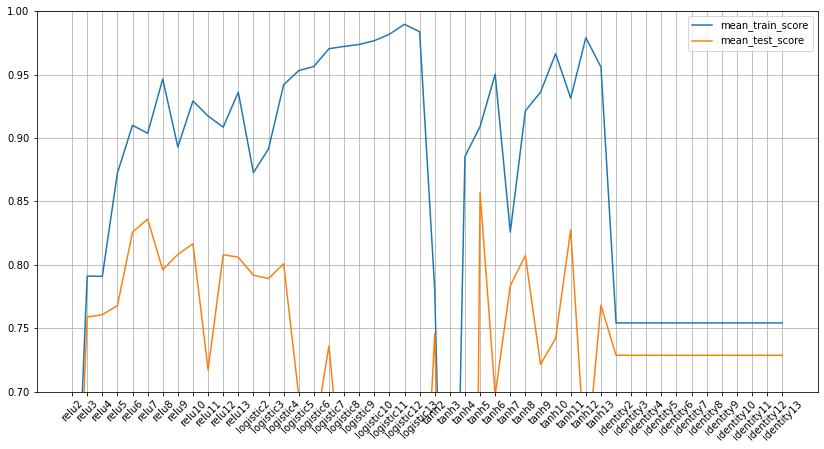

In [10]:
#plt.xticks(ticks = tickvalues ,labels = labellist, rotation = 'vertical')
tickvalues = result.index
plt.figure(figsize=(14, 7))
p1=plt.plot(result['mean_train_score'])
p2=plt.plot(result['mean_test_score'])
plt.legend((p1[0], p2[0]), ('mean_train_score', 'mean_test_score'), loc=1)
plt.xticks(ticks = tickvalues ,labels = result['xlabel'], rotation=45)
plt.ylim([0.7,1.0])
plt.grid();

In [66]:
#results.T

In [11]:
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': 5,
 'max_fun': 15000,
 'max_iter': 10000,
 'random_state': 42,
 'solver': 'lbfgs'}

In [12]:
best_model = grid_search.best_estimator_
best_model

MLPRegressor(activation='tanh', hidden_layer_sizes=5, max_iter=10000,
             random_state=42, solver='lbfgs')

In [13]:
validation_score = grid_search.best_score_
print("validation score", validation_score)

validation score 0.8568727873891623


vérifier over fitting (score = R2)

définition de over fitting :  train score - validation score < 0.05 (5%)

<b>meilleur modèle</b>

    train score = 0.908996
    validation score = 0.856873
    train score - validation score = 0.052123

modèle qui n'est pas over fitting ('activation':'tanh', hidden_layer_sizes:7)

    train score = 0.825765
    validation score = 0.783509
    train score - validation score = 0.042256
    
<b>Obserbation</b> :
meilleur modèle est un petit peu over fitting mais c'est lèger, donc je le prends comme le meilleur modèle.

meilleur modèle

In [14]:
grid_search.score(X_train, y_train)

0.8996117309370805

In [15]:
y_predict_train = best_model.predict(X_train)

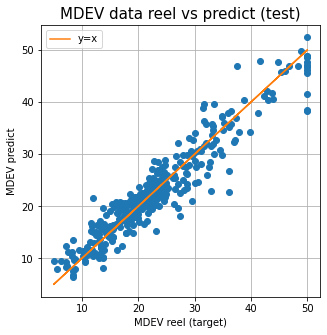

Method: logistic
RMSE on the data: 2.9531
Coefficient of determination: 0.8996


In [16]:
plt.figure(figsize=(5, 5))
plt.plot(y_train, y_predict_train, 'o')
plt.plot(y_train, y_train, label='y=x')
plt.title("MDEV data reel vs predict (test)", fontsize=15)
plt.xlabel("MDEV reel (target)")            
plt.ylabel("MDEV predict")
plt.legend()
plt.grid()
plt.show()

rmse = mean_squared_error(y_train, y_predict_train, squared=False)
print('Method: logistic')
print('RMSE on the data: %.4f' %rmse) 
print('Coefficient of determination: %.4f' % r2_score(y_train, y_predict_train))

### save the best model avec joblib

In [17]:
%%time
# 構築したモデルの保存
filename = 'model_MLPR.pkl'
joblib.dump(best_model,filename)

Wall time: 13 ms


['model_MLPR.pkl']

### vérification de 2èm meilleur modèle

Je n'ai pas pris le 2ème meilleur modèle come the best model mais j'ai fitter pour voir le resultat.

In [18]:
model_mlpr_7=MLPRegressor(activation='tanh', hidden_layer_sizes=(7), max_iter=10000,alpha= 0.0001,max_fun= 15000,
             random_state=42, solver='lbfgs')

In [19]:
model_mlpr_7.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=7, max_iter=10000,
             random_state=42, solver='lbfgs')

In [20]:
y_predictest_train = model_mlpr_7.predict(X_train)

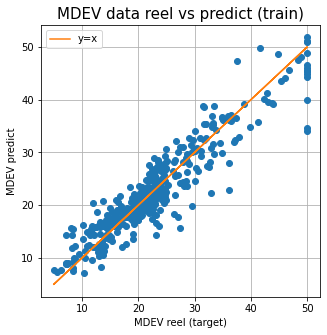

Method: tanh
RMSE on the data: 3.3760
Coefficient of determination: 0.8688


In [21]:
plt.figure(figsize=(5, 5))
plt.plot(y_train, y_predictest_train, 'o')
plt.plot(y_train, y_train, label='y=x')
plt.title("MDEV data reel vs predict (train)", fontsize=15)
plt.xlabel("MDEV reel (target)")            
plt.ylabel("MDEV predict")
plt.legend()
plt.grid()
plt.show()

rmse = mean_squared_error(y_train, y_predictest_train, squared=False)
print('Method: tanh')
print('RMSE on the data: %.4f' %rmse) 
print('Coefficient of determination: %.4f' % r2_score(y_train, y_predictest_train))

### save the 2èm model avec joblib

In [22]:
%%time
# 構築したモデルの保存
filename = 'model_MLPR_7.pkl'
joblib.dump(model_mlpr_7,filename)

Wall time: 8.98 ms


['model_MLPR_7.pkl']

In [ ]:
"""GRID = [
    {'scaler': [StandardScaler()],
     'estimator': [MLPClassifier(random_state=RANDOM_SEED)],
     'estimator__solver': ['adam'],
     'estimator__learning_rate_init': [0.0001],
     'estimator__max_iter': [300],
     'estimator__hidden_layer_sizes': [(500, 400, 300, 200, 100), (400, 400, 400, 400, 400), (300, 300, 300, 300, 300), (200, 200, 200, 200, 200)],
     'estimator__activation': ['logistic', 'tanh', 'relu'],
     'estimator__alpha': [0.0001, 0.001, 0.005],
     'estimator__early_stopping': [True, False]
     }
]

PIPELINE = Pipeline([('scaler', None), ('estimator', MLPClassifier())])"""